- Importando bibliotecas 

In [5]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Criando variáveis

In [6]:
pe = gpd.read_file('pop_pe_2010_2022.gpkg')
pe = pe[pe['NM_MUN'] != 'Fernando de Noronha' ]
pe['dif_pop'] = pe['POP_2022'] - pe['POP_2010'] 
pe.head()

,NM_MUN,CD_MUN,SIGLA_UF,AREA_KM2,POP_2010,POP_2022,geometry,dif_pop
0,Abreu e Lima,2600054,PE,126.384,94429,99331,"MULTIPOLYGON (((-34.9148 -7.9276, -34.91576 -7...",4902
1,Afogados da Ingazeira,2600104,PE,377.696,35088,40120,"MULTIPOLYGON (((-37.6649 -7.83209, -37.66622 -...",5032
2,Afrânio,2600203,PE,1490.594,17586,16486,"MULTIPOLYGON (((-41.03831 -8.78485, -41.03979 ...",-1100
3,Agrestina,2600302,PE,200.369,22679,23739,"MULTIPOLYGON (((-35.94151 -8.53737, -35.94532 ...",1060
4,Água Preta,2600401,PE,531.935,33095,26473,"MULTIPOLYGON (((-35.38049 -8.71793, -35.3699 -...",-6622


In [7]:
pe.dtypes

NM_MUN        object
CD_MUN        object
SIGLA_UF      object
AREA_KM2     float64
POP_2010       int64
POP_2022       int64
geometry    geometry
dif_pop        int64
dtype: object

- Verificando o sistema de referência geográfica

In [8]:
pe.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

- Estatísticas descritivas

In [25]:
pe_est = gpd.read_file('pop_pe_2010_2022.gpkg')
pe_est[['POP_2010', 'POP_2022']].describe().round(1)

,POP_2010,POP_2022
count,185.0,185.0
mean,47548.4,48924.9
std,129168.6,129292.9
min,2630.0,2947.0
25%,13594.0,13359.0
50%,21884.0,21173.0
75%,36628.0,36982.0
max,1537704.0,1494586.0


Pernambuco possui 184 municípios mais um arquipélago de Fernando de Noronha (PE). O estado de pernambuco é habitado por 9 milhões e 58 mil de pessoas residentes.  

A cidade com mais habitantes é a capital Recife que possui 1.494.586 pessoas atualmente. Já a cidade e a ilha com a menor população do estado de Pernambuco são o município de Itacuruba e Fernando de Noronha. Itacuruba possuindo 4.394 habitantes e Fernando de Noronha 2.947 habitantes. 

De 2010 a 2022 houveu um aumento de aproximadamente 3% da população pernambucana.

- Mapas

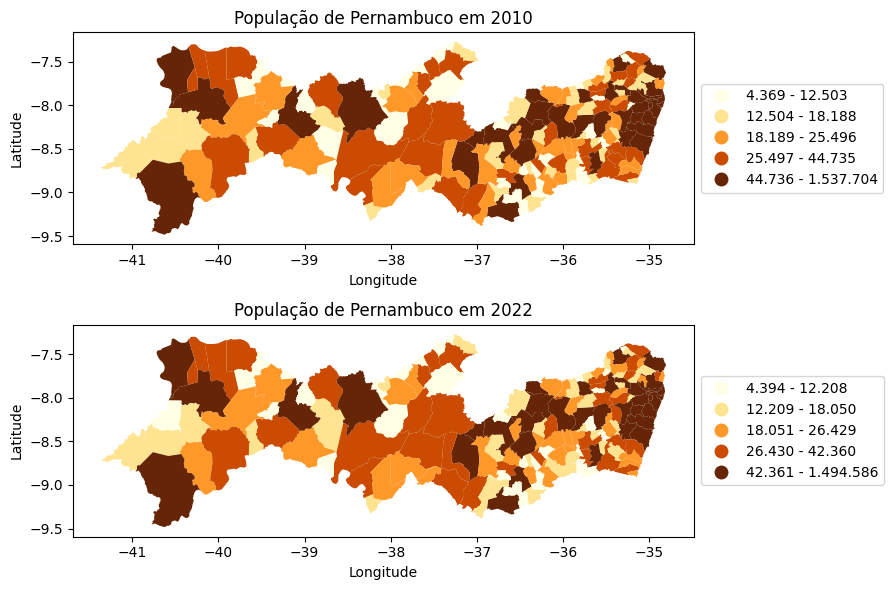

In [35]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6))


pe.plot(column='POP_2010', scheme='Quantiles', cmap='YlOrBr', legend=True, 
          legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}, ax=ax1)

ax1.set_title("População de Pernambuco em 2010")
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

new_labels=[
            '4.369 - 12.503',
            '12.504 - 18.188',
            '18.189 - 25.496',
            '25.497 - 44.735',
            '44.736 - 1.537.704'
]

leg = ax1.get_legend()
for text, label in zip(leg.get_texts(), new_labels):
    text.set_text(label)


pe.plot(column='POP_2022', scheme='Quantiles', cmap='YlOrBr', legend=True, 
          legend_kwds={ 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), "fmt": "{:,.0f}"}, ax=ax2)

ax2.set_title("População de Pernambuco em 2022")
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

new_labels=[
            '4.394 - 12.208',
            '12.209 - 18.050',
            '18.051 - 26.429',
            '26.430 - 42.360',
            '42.361 - 1.494.586'
]

leg = ax2.get_legend()
for text, label in zip(leg.get_texts(), new_labels):
    text.set_text(label)

plt.tight_layout()
plt.show()


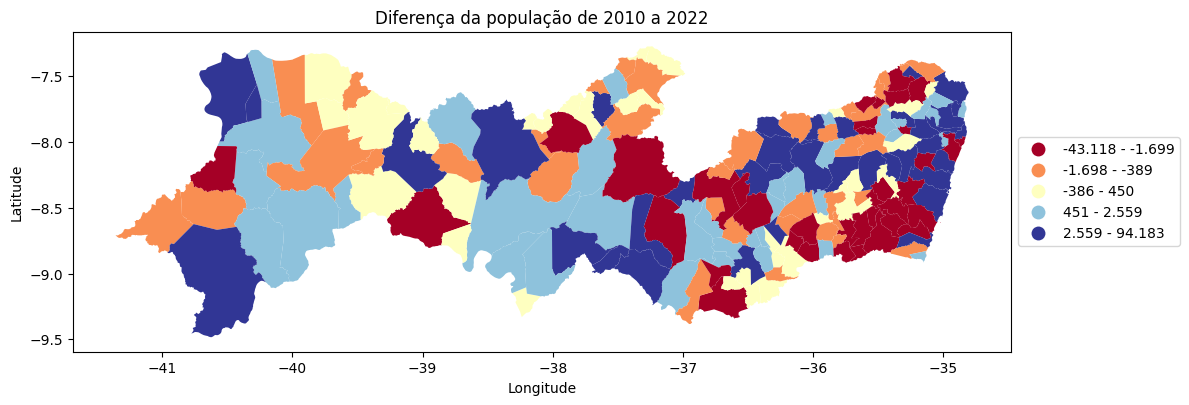

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))


pe.plot(column='dif_pop', scheme='Quantiles', cmap='RdYlBu', legend=True, 
          legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}, ax=ax)

ax.set_title("Diferença da população de 2010 a 2022")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

new_labels=[
            '-43.118 - -1.699',
            '-1.698 - -389',
            '-386 - 450',
            '451 - 2.559',
            '2.559 - 94.183'
]

leg = ax.get_legend()
for text, label in zip(leg.get_texts(), new_labels):
    text.set_text(label)

plt.tight_layout()
plt.show()

A capital pernambucana (Recife) foi o município com a maior perda populacional de 43 mil pessoas. Essa diminuição pode ser explicada pela desmetropolização. A desmetropolização é um processo social onde as pessoas mudam da capital para outros municípios da região metropolitana ou para o interior por causa de problemas de qualidade de vida, inchaço urbano, violência urbana e altos preços dos alugueis.

A partir dessa explicação, a cidade de Petrolina, localizada no sertão pernambucano, cresceu seu indice populacional em 31% em relação a 2010.